In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("darkgrid")

In [2]:
rfm = pd.read_csv("rfm.csv")
rfm = rfm.set_index("CustomerID")
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class
CustomerID,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver
12347.0,2,182,4310.00,5,5,5,555,15,platinum
12348.0,75,31,1797.24,2,3,4,234,9,gold
12349.0,19,73,1757.55,4,4,4,444,12,platinum
12350.0,310,17,334.40,1,2,2,122,5,silver
...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver
18281.0,181,7,80.82,1,1,1,111,3,silver
18282.0,8,12,178.05,5,1,1,511,7,silver


In [3]:
rfm_cluster = rfm.iloc[:,0:3]
rfm_cluster

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,182,4310.00
12348.0,75,31,1797.24
12349.0,19,73,1757.55
12350.0,310,17,334.40
...,...,...,...
18280.0,278,10,180.60
18281.0,181,7,80.82
18282.0,8,12,178.05


In [4]:
rfm_cluster_log = np.log1p(rfm_cluster)
rfm_cluster_log

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,5.789960,0.693147,11.253955
12347.0,1.098612,5.209486,8.368925
12348.0,4.330733,3.465736,7.494564
12349.0,2.995732,4.304065,7.472245
12350.0,5.739793,2.890372,5.815324
...,...,...,...
18280.0,5.631212,2.397895,5.201806
18281.0,5.204007,2.079442,4.404522
18282.0,2.197225,2.564949,5.187665


## 스케일 조정하기

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(rfm_cluster_log)

StandardScaler()

In [6]:
X = scaler.fit_transform(rfm_cluster_log)
X

array([[ 1.46190736, -2.43788926,  3.71030846],
       [-2.0405272 ,  1.18891259,  1.41710205],
       [ 0.37248773, -0.211389  ,  0.72210361],
       ...,
       [-1.22033272, -0.93475683, -1.11156693],
       [-1.65915848,  2.2911166 ,  0.82490915],
       [-0.03554715,  0.42858907,  0.73960806]])

In [7]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouettes = []
range_n_clusters = range(2, 20)

for i in range_n_clusters:
    kmeans = KMeans(n_clusters = i, random_state = 42)
    # rfm_norm 값을 학습하고
    # 리스트에 inertia_ 값을 넣어 elbow 값을 봅니다.
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X, kmeans.labels_))

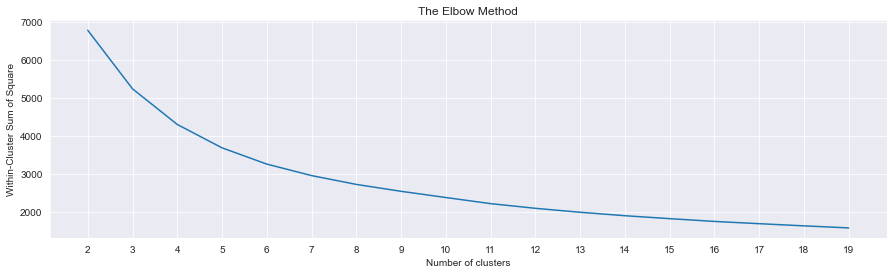

In [8]:
plt.figure(figsize=(15,4))
plt.plot(range_n_clusters, inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-Cluster Sum of Square')
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

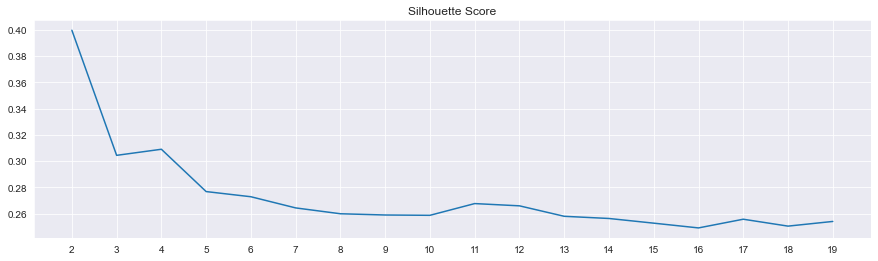

In [9]:
plt.figure(figsize=(15, 4))
plt.title('Silhouette Score')
plt.plot(range_n_clusters, silhouettes)
plt.xticks(range_n_clusters)
plt.show()

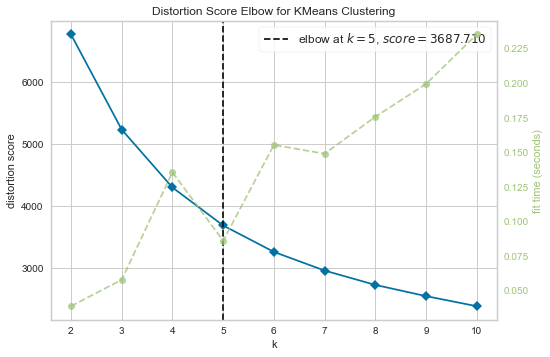

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(kmeans, k=10)
Elbow_M.fit(X)
Elbow_M.show()

In [11]:
from sklearn.cluster import KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

KMeans(n_clusters=5)

In [12]:
kmeans.cluster_centers_

array([[-1.35975328,  1.33399036,  1.38858251],
       [ 0.82352018, -0.27961079, -0.31657062],
       [-0.82827734, -0.27764174, -0.35994432],
       [ 0.83560811, -1.36471241, -1.22131938],
       [-0.00889614,  0.66557371,  0.62457257]])

In [13]:
kmeans.labels_

array([1, 0, 4, ..., 2, 0, 4], dtype=int32)

In [14]:
rfm['Cluster'] = kmeans.labels_
rfm

,Recency,Frequency,MonetaryValue,R,F,M,RFM_segment,RFM_score,RFM_class,Cluster
CustomerID,,,,,,,,,,
12346.0,326,1,77183.60,1,1,5,115,7,silver,1
12347.0,2,182,4310.00,5,5,5,555,15,platinum,0
12348.0,75,31,1797.24,2,3,4,234,9,gold,4
12349.0,19,73,1757.55,4,4,4,444,12,platinum,4
12350.0,310,17,334.40,1,2,2,122,5,silver,1
...,...,...,...,...,...,...,...,...,...,...
18280.0,278,10,180.60,1,1,1,111,3,silver,3
18281.0,181,7,80.82,1,1,1,111,3,silver,3
18282.0,8,12,178.05,5,1,1,511,7,silver,2


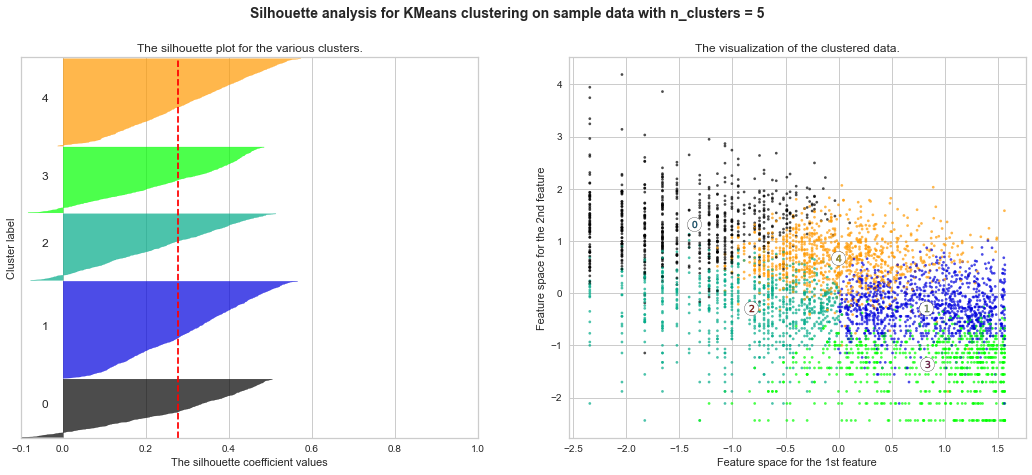

In [15]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
silhouette_avg = silhouette_score(X, kmeans.labels_)

from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Create a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
# The silhouette coefficient can range from -1, 1 but in this example all
# lie within [-0.1, 1]
ax1.set_xlim([-0.1, 1])
# The (n_clusters+1)*10 is for inserting blank space between silhouette
# plots of individual clusters, to demarcate them clearly.
ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
cluster_labels = kmeans.labels_
sample_silhouette_values = silhouette_samples(X, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(
    X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
)

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(
    centers[:, 0],
    centers[:, 1],
    marker="o",
    c="white",
    alpha=1,
    s=200,
    edgecolor="k",
)

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()


<AxesSubplot:xlabel='Cluster', ylabel='RFM_score'>

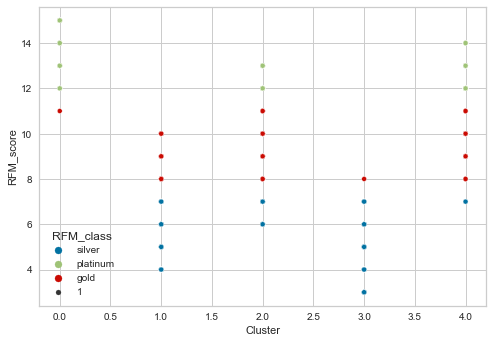

In [16]:
sns.scatterplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

<AxesSubplot:xlabel='Cluster', ylabel='RFM_score'>

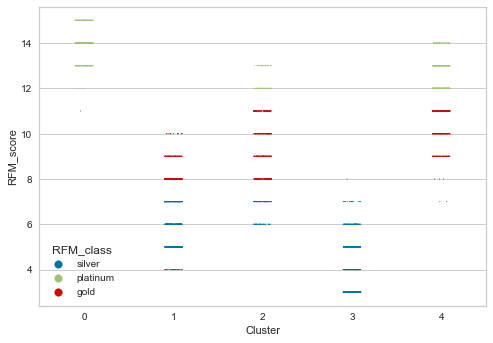

In [17]:
sns.stripplot(data=rfm, x="Cluster", y="RFM_score", hue="RFM_class", size=1)

<AxesSubplot:xlabel='MonetaryValue', ylabel='RFM_score'>

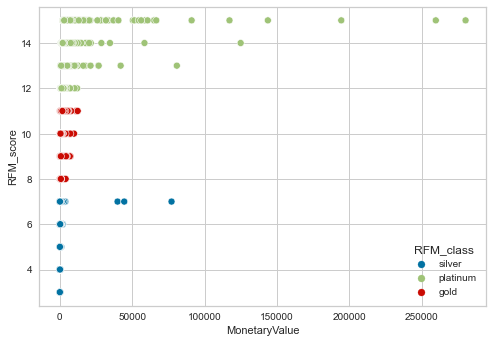

In [18]:
sns.scatterplot(data=rfm, x="MonetaryValue", y="RFM_score", hue="RFM_class")

<AxesSubplot:xlabel='Frequency', ylabel='RFM_score'>

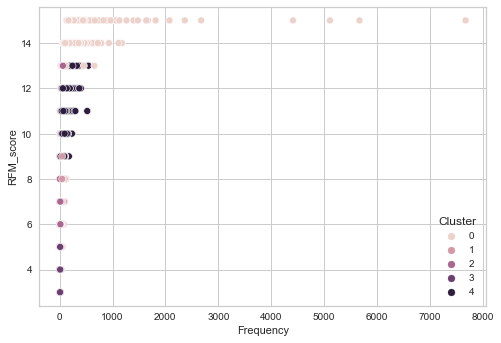

In [19]:
sns.scatterplot(data=rfm, x="Frequency", y="RFM_score", hue="Cluster")

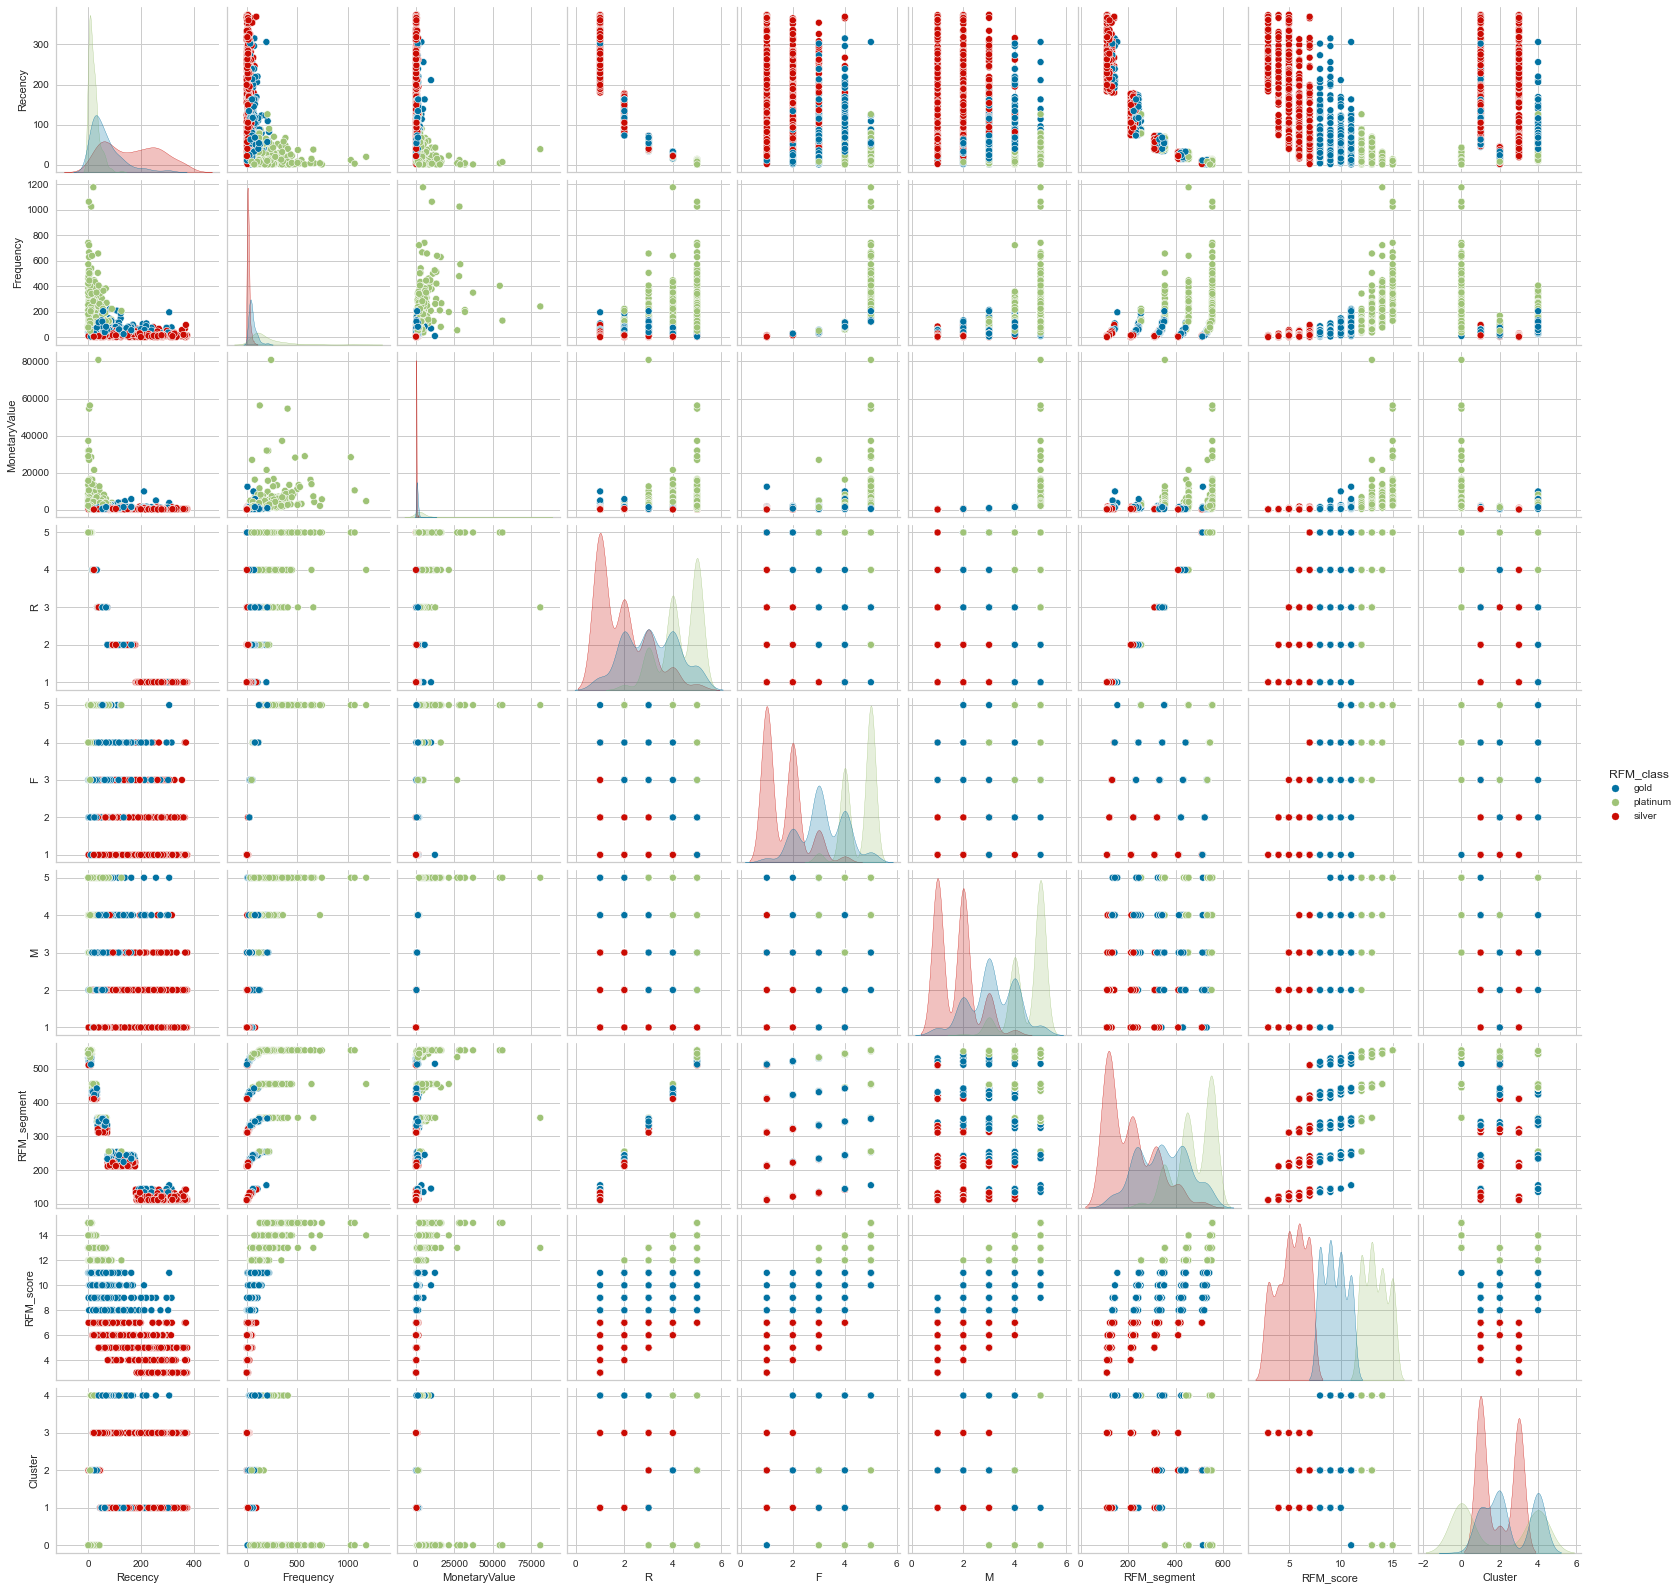

In [20]:
sns.pairplot(data=rfm.sample(1000), hue="RFM_class")